# Gradient Descent - Logistic Regression

## Introduction


Gradient descent logistic regression is an optimization algorithm used to predict the probability of a binary outcome.

It iteratively adjusts the model's parameters to minimize the difference between the predicted and actual classifications.

This method works well for problems where the response variable is categorical—typically yes/no or true/false. The goal is to find the best fitting logistic function that describes the relationship between the dependent variable and one or more independent variables.

## Algorithm

# Gradient Descent Logistic Regression

Gradient descent logistic regression is an optimization algorithm for fitting a logistic regression model, typically used for binary classification tasks. The steps of the algorithm are as follows:

1. **Model Definition**: We model the probability of a given input belonging to the default class (labeled "1") using a logistic function:

   $$ P(Y=1|X) = \frac{1}{1 + e^{-(b_0 + b_1X)}} $$

   where \( b_0 \) is the intercept, \( b_1 \) is the coefficient for the input feature \( X \), and the output is a probability that lies between 0 and 1.

2. **Cost Function**: The cost function used in logistic regression is the binary cross-entropy loss or log loss, which is:

   $$ J(b_0, b_1) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(P(y^{(i)}|x^{(i)})) + (1-y^{(i)}) \log(1-P(y^{(i)}|x^{(i)}))] $$

   Here, \( m \) is the number of training examples, \( y^{(i)} \) is the actual label, and \( P(y^{(i)}|x^{(i)}) \) is the predicted probability for the \( i \)-th sample.

3. **Gradient Descent**: This process iteratively updates the parameters \( b_0 \) and \( b_1 \) to minimize the cost function using the update rules:

   $$ b_0 := b_0 - \alpha \frac{\partial J}{\partial b_0} $$
   $$ b_1 := b_1 - \alpha \frac{\partial J}{\partial b_1} $$

   where \( \alpha \) is the learning rate.

4. **Partial Derivatives**: The partial derivatives of the cost function with respect to \( b_0 \) and \( b_1 \) are:

   $$ \frac{\partial J}{\partial b_0} = \frac{1}{m} \sum_{i=1}^{m} (P(y^{(i)}|x^{(i)}) - y^{(i)}) $$
   $$ \frac{\partial J}{\partial b_1} = \frac{1}{m} \sum_{i=1}^{m} (P(y^{(i)}|x^{(i)}) - y^{(i)}) x^{(i)} $$

5. **Updating the Parameters**: The update rules are applied until convergence, which occurs when changes to \( b_0 \) and \( b_1 \) are negligible.

6. **Prediction**: For new input data, the model predicts the binary outcome based on the probability \( P(Y=1|X) \). If \( P(Y=1|X) \) is greater than 0.5, the predicted class is "1"; otherwise, it is "0".

This algorithm is efficient for binary classification, but it assumes a linear relationship between the log odds and the features and can be sensitive to outliers.


## Implementation

In this analysis, we will employ the Gradient Descent Logistic Regression model to investigate the Rolling Stone Top 500 Albums dataset. Our aim is to explore the potential of logistic regression in predicting categorical outcomes from this dataset, which could involve classifying albums into genres. By applying logistic regression, we hope to uncover underlying patterns within the album features that influence these outcomes.

Loading Dataset

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd

# Load dataset
# Attempt to load the dataset with a different encoding
try:
    df = pd.read_csv('albumlist.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('albumlist.csv', encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv('albumlist.csv', encoding='cp1252')
df.head(5)

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


 Implementing Gradient Descent for Logistic Regression

In [2]:
# Preprocessing
# Convert 'Genre' to a binary variable where 1 indicates 'Rock' and 0 indicates other genres
df['Is_Rock'] = df['Genre'].apply(lambda x: 1 if 'rock' in x.lower() else 0)


# Encoding categorical features
le = LabelEncoder()
df['Artist_Encoded'] = le.fit_transform(df['Artist'])

# Features and Target
X = df[['Year', 'Artist_Encoded']]  # You could add more features here
y = df['Is_Rock']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first oversamples the training data and then runs logistic regression
pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)


Model Evaluation

In [3]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'binary' if you have binary classification
print(f'F1 Score: {f1}')

# For multi-class classification, you might want to compute the F1 score for each class
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
print(f'Weighted F1 Score: {f1_weighted}')

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.59
F1 Score: 0.6821705426356588
Weighted F1 Score: 0.6120690031662844
              precision    recall  f1-score   support

           0       0.34      0.56      0.42        27
           1       0.79      0.60      0.68        73

    accuracy                           0.59       100
   macro avg       0.56      0.58      0.55       100
weighted avg       0.67      0.59      0.61       100

[[15 12]
 [29 44]]


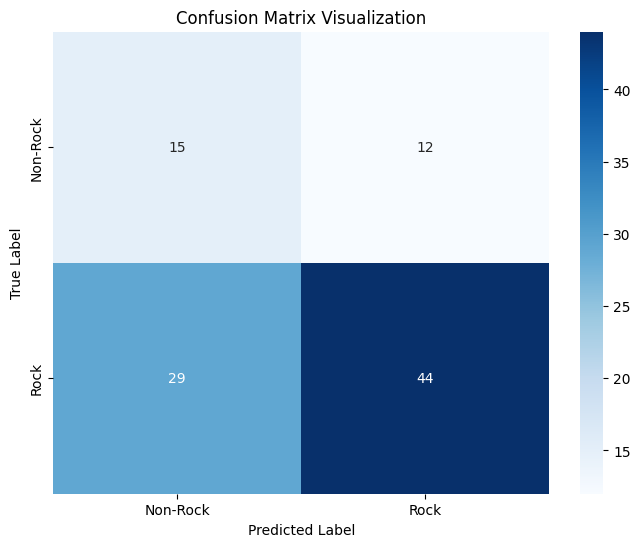

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined and contain the true labels and the predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Rock', 'Rock'], yticklabels=['Non-Rock', 'Rock'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()


The performance metrics given indicate the following about the logistic regression model:

1. **Accuracy (0.59 or 59%):** This metric tells us that 59% of the total predictions made by the model were correct. While this is better than random guessing, it suggests that there's significant room for improvement.

2. **F1 Score (0.68 for class 1):** The F1 score for the positive class (which we can assume to be 'Rock') is relatively higher than the F1 score for the negative class. This score is the harmonic mean of precision and recall, giving us a sense of the balance between these two metrics.

3. **Weighted F1 Score (0.61):** This takes into account the F1 score of each class, weighted by the number of samples in each class. It is lower than the F1 score for the positive class, indicating that the model is performing worse on the less represented class.

The confusion matrix provides a deeper insight:

**Confusion Matrix:**

**[[15 12]:** Of the 27 albums that were not Rock, the model correctly identified 15 as not Rock (true negatives), but incorrectly labeled 12 as Rock (false positives).

**[29 44]]:** Of the 73 Rock albums, the model correctly identified 44 as Rock (true positives), but 29 were incorrectly labeled as not Rock (false negatives).

## Conclusion

In summary, while the model is reasonably good at identifying Rock albums, it struggles with identifying non-Rock albums, often confusing them with Rock. The model is particularly weak in terms of precision for non-Rock albums, indicating a tendency to label albums as Rock even when they are not. This could potentially be addressed by gathering more balanced data, feature engineering, or trying different model architectures or hyperparameters.